In [22]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import pandas as pd

data_lundi = pd.read_csv('Monday-WorkingHours.pcap_ISCX.csv')
data_mercredi = pd.read_csv('Wednesday-workingHours.pcap_ISCX.csv')

df = pd.concat([data_lundi, data_mercredi])

df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [24]:
N = len(df.index)
print(f"Number of samples : {N}.")

N_feat = len(df.columns.values)
print(f"Number of features : {N_feat}.")  

categories = df[' Label'].unique()
print("Different Categories:", categories)

Number of samples : 1222621.
Number of features : 79.
Different Categories: <StringArray>
[          'BENIGN',    'DoS slowloris', 'DoS Slowhttptest',
         'DoS Hulk',    'DoS GoldenEye',       'Heartbleed']
Length: 6, dtype: str



Counts per category:
 Label
BENIGN              969949
DoS Hulk            231073
DoS GoldenEye        10293
DoS slowloris         5796
DoS Slowhttptest      5499
Heartbleed              11
Name: count, dtype: int64


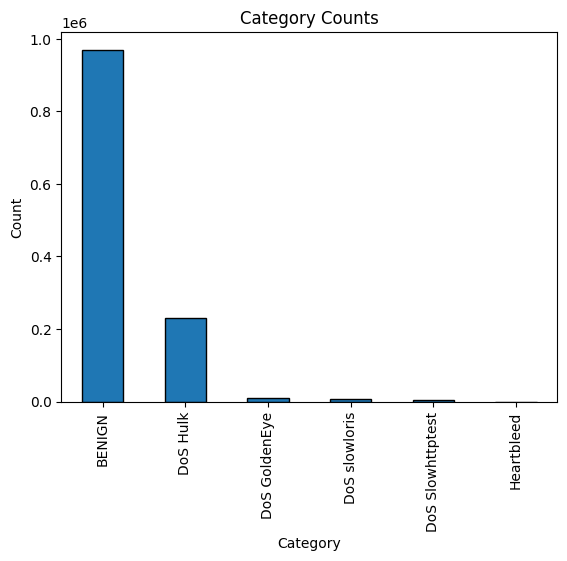

In [25]:
import matplotlib.pyplot as plt

category_counts = df[' Label'].value_counts()
print("\nCounts per category:")
print(category_counts)

category_counts.plot(kind='bar', edgecolor='black')
plt.title("Category Counts")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


In [26]:
missing_values_headers = []
headers = df.columns.values.tolist()

for header in headers:
    if df[header].isnull().any():
        missing_values_headers.append(header)

print(f"Les attributs contenant des valeurs manquantes sont {missing_values_headers}.")

print(len(df))
df = df.dropna(subset = ['Flow Bytes/s'])
print(len(df))

Les attributs contenant des valeurs manquantes sont ['Flow Bytes/s'].
1222621
1221549
